<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/PandaSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandasql

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import pandasql as ps

In [ ]:
# date parsing
def dateparse(d):
    dt = d 
    return pd.datetime.strptime(dt, '%d-%m-%Y')

# reading the dataset 
df = pd.read_csv('/content/FNP Data Engineer and Analyst Test.csv', parse_dates= ['date'], date_parser=dateparse)

In [ ]:
# top 5 rows of the dataset
df.head(5)

,date,description,amount
0,2018-01-02,MALTHURST/,5.46
1,2018-01-03,BROXTOWE BOROUGH C,49.67
2,2018-01-04,EDF ENERGY,8.43
3,2018-01-08,VANQUIS BANK,2441.46
4,2018-01-08,TV LICENCE QBP1,3.53


In [ ]:
# month, weekday, day variable created
df['month']=df['date'].dt.month
df['weekday']=df['date'].dt.day_name()
df['day']=df['date'].dt.day

In [ ]:
df.head(5)

,date,description,amount,month,weekday,day
0,2018-01-02,MALTHURST/,5.46,1,Tuesday,2
1,2018-01-03,BROXTOWE BOROUGH C,49.67,1,Wednesday,3
2,2018-01-04,EDF ENERGY,8.43,1,Thursday,4
3,2018-01-08,VANQUIS BANK,2441.46,1,Monday,8
4,2018-01-08,TV LICENCE QBP1,3.53,1,Monday,8


In [ ]:
# fortnightly variable classified
df['fortnight'] =  np.where(df['date'].dt.day < 15, '1st Fortnight', '2nd Fortnight')

In [ ]:
df.head(5)

,date,description,amount,month,weekday,day,fortnight
0,2018-01-02,MALTHURST/,5.46,1,Tuesday,2,1st Fortnight
1,2018-01-03,BROXTOWE BOROUGH C,49.67,1,Wednesday,3,1st Fortnight
2,2018-01-04,EDF ENERGY,8.43,1,Thursday,4,1st Fortnight
3,2018-01-08,VANQUIS BANK,2441.46,1,Monday,8,1st Fortnight
4,2018-01-08,TV LICENCE QBP1,3.53,1,Monday,8,1st Fortnight


In [ ]:
# last friday condition set
df['lastfriday'] = (df['weekday'] == 'Friday') & (df['day'] >= 23) & (df['day'] <= 30)


In [ ]:
df.head(5)

,date,description,amount,month,weekday,day,fortnight,lastfriday
0,2018-01-02,MALTHURST/,5.46,1,Tuesday,2,1st Fortnight,False
1,2018-01-03,BROXTOWE BOROUGH C,49.67,1,Wednesday,3,1st Fortnight,False
2,2018-01-04,EDF ENERGY,8.43,1,Thursday,4,1st Fortnight,False
3,2018-01-08,VANQUIS BANK,2441.46,1,Monday,8,1st Fortnight,False
4,2018-01-08,TV LICENCE QBP1,3.53,1,Monday,8,1st Fortnight,False


In [ ]:
# no of duplicate transaction on last friday
df['lastfriday'].value_counts()

False    319
True      23
Name: lastfriday, dtype: int64

In [ ]:
# unique values in description
print(df['description'].unique())

['MALTHURST/' 'BROXTOWE BOROUGH C' 'EDF ENERGY' 'VANQUIS BANK'
 'TV LICENCE QBP1' 'CAPITAL ONE' 'WILTSHIRE COUNCIL'
 'WITHDRAWAL BY AUTOTELLER (ON LINE)' 'CURRYS 5003287371'
 'WALLACE JONES EST' 'SKY DIGITAL' 'SEVERN TRENT WATER' 'EE & T-MOBILE'
 'CLEANING' 'ST/' 'ICELAND/' 'TV LICENCE MBP' 'WALTER WHITE'
 'BILL PAYMENT DEBIT' 'VERTU MOTORS PLC' 'RENT' 'UMBRELLA CORPORATION'
 'AMAZON/' 'BRIGHTHOUSE/' 'BRISTOLWESSEXWATER' 'M/ T' 'CSA'
 'FORESTER LIFE' 'MARLIN EUROPE V LI' 'HOWDENS/' 'DATALABS' 'RSPB' 'VCI/'
 'HYNDBURN BOROUGH C' 'JUST/' 'GE MONEY' 'SAINSBURYS/' 'TESCO BANK'
 'DANIEL/' 'ITUNES.COM/BILL/' 'NATIONAL/' 'UMBRELLA CORPORATION LTD'
 'WWW.NETFLIX.COM/' 'ALL/' 'B/ L' 'BRGAS-GAS'
 'UMBRELLA CORPORATION PAYMENT' 'BRGAS-ELECTRICITY']


In [ ]:
# distribution of the sub variables of the description attribute
df.groupby("description").describe() 

amount                                     \
                                    count         mean          std      min   
description                                                                    
ALL/                                  5.0    32.140000    12.958354    12.64   
AMAZON/                               8.0   159.433750   273.255384     3.92   
B/ L                                  8.0    31.946250    47.952932     3.11   
BILL PAYMENT DEBIT                    9.0   109.696667   188.427516     1.88   
BRGAS-ELECTRICITY                     3.0    43.846667    33.275884     7.12   
BRGAS-GAS                             3.0   158.470000   221.641499     1.31   
BRIGHTHOUSE/                         10.0    29.138000    30.063852     6.04   
BRISTOLWESSEXWATER                    6.0    36.281667    37.329055     0.68   
BROXTOWE BOROUGH C                    5.0    37.214000    30.046827     5.30   
CAPITAL ONE                           8.0   182.741250   253.446152     5.71   
CLEANING                             10.0    50.000000     0.000000    50.00   
CSA                                   9.0   542.570000  1430.871812     8.37   
CURRYS 5003287371                     9.0    84.698889   100.037520     4.23   
DANIEL/                               7.0   247.748571   457.616944     5.50   
DATALABS                              6.0  2822.170000     0.000000  2822.17   
EDF ENERGY                           11.0   139.364545   347.339368     2.41   
EE & T-MOBILE                         9.0   106.472222    98.890973     9.85   
FORESTER LIFE                         6.0   509.865000  1056.236389    42.00   
GE MONEY                              6.0    74.150000    52.802783     1.86   
HOWDENS/                              9.0    59.463333    61.774418     6.19   
HYNDBURN BOROUGH C                    3.0    21.326667    16.518866     2.80   
ICELAND/                              9.0    53.988889    44.397383     5.26   
ITUNES.COM/BILL/                      8.0   142.465000   161.972045     2.18   
JUST/                                 7.0   115.161429   106.748769    11.90   
M/ T                                  6.0    59.748333    41.868272    18.61   
MALTHURST/                            8.0    68.448750    88.459919     5.46   
MARLIN EUROPE V LI                   10.0    97.038000   169.634476     1.68   
NATIONAL/                            10.0    74.518000   115.208224     3.79   
RENT                                  6.0  1075.000000     0.000000  1075.00   
RSPB                                  2.0    20.000000     0.000000    20.00   
SAINSBURYS/                          11.0    39.682727    32.268394     1.88   
SEVERN TRENT WATER                    9.0    30.663333    32.444695     3.15   
SKY DIGITAL                           4.0   543.362500  1049.952237    12.22   
ST/                                   7.0    47.670000    44.813463     2.13   
TESCO BANK                           10.0   216.572000   352.322887     2.43   
TV LICENCE MBP                        5.0    80.444000    43.890450    41.05   
TV LICENCE QBP1                      12.0   205.400000   348.774919     2.69   
UMBRELLA CORPORATION                  2.0  1075.000000     0.000000  1075.00   
UMBRELLA CORPORATION LTD              3.0  1075.000000     0.000000  1075.00   
UMBRELLA CORPORATION PAYMENT          1.0  1075.000000          NaN  1075.00   
VANQUIS BANK                         11.0   404.486364   741.054379     1.14   
VCI/                                  3.0   125.350000    77.502338    51.37   
VERTU MOTORS PLC                      7.0    41.390000    43.959079     3.64   
WALLACE JONES EST                     7.0    64.708571    50.622967     7.92   
WALTER WHITE                         12.0   101.238333     6.106546    91.58   
WILTSHIRE COUNCIL                     8.0    79.721250    86.892187    21.79   
WITHDRAWAL BY AUTOTELLER (ON LINE)    6.0    96.960000   143.551751     5.48   
WWW.NETFLIX.COM/                   

In [ ]:
# checking the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 8 columns):
date           342 non-null datetime64[ns]
description    342 non-null object
amount         341 non-null float64
month          342 non-null int64
weekday        342 non-null object
day            342 non-null int64
fortnight      342 non-null object
lastfriday     342 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 19.1+ KB


In [ ]:
# shape of the dataset
df.shape

(342, 8)

In [ ]:
# any missing values in the columns of the dataset
df.isnull().any()

date           False
description    False
amount          True
month          False
weekday        False
day            False
fortnight      False
lastfriday     False
dtype: bool

In [ ]:
# missing column function
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 8 columns and 342 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
amount,0,1,0.3,1,0.3,float64


In [ ]:
# filling missing value columns
df['amount'].fillna(0,inplace=True)

Text(0, 0.5, 'Frequency')

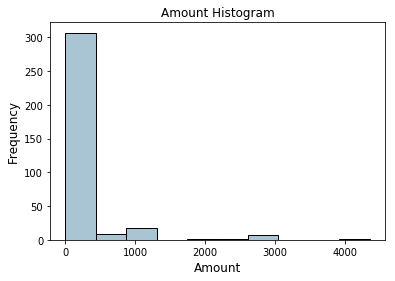

In [ ]:
# distribution of the amount variable
fig, ax = plt.subplots()

df['amount'].hist(color='#A9C5D3', edgecolor='black', grid=False)

ax.set_title('Amount Histogram', fontsize=12)
ax.set_xlabel('Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
# no of transaction greater than 1000
df[df['amount'] > 1000].groupby('description')['amount'].count()

description
CSA                             1
DANIEL/                         1
DATALABS                        6
EDF ENERGY                      1
FORESTER LIFE                   1
RENT                            6
SKY DIGITAL                     1
TESCO BANK                      1
TV LICENCE QBP1                 1
UMBRELLA CORPORATION            2
UMBRELLA CORPORATION LTD        3
UMBRELLA CORPORATION PAYMENT    1
VANQUIS BANK                    2
Name: amount, dtype: int64

In [ ]:
# no of transaction less than 1000
df[df['amount'] < 1000].groupby('description')['amount'].count()

description
ALL/                                   5
AMAZON/                                8
B/ L                                   8
BILL PAYMENT DEBIT                     9
BRGAS-ELECTRICITY                      3
BRGAS-GAS                              3
BRIGHTHOUSE/                          10
BRISTOLWESSEXWATER                     6
BROXTOWE BOROUGH C                     5
CAPITAL ONE                            8
CLEANING                              10
CSA                                    8
CURRYS 5003287371                      9
DANIEL/                                6
EDF ENERGY                            10
EE & T-MOBILE                          9
FORESTER LIFE                          5
GE MONEY                               6
HOWDENS/                               9
HYNDBURN BOROUGH C                     3
ICELAND/                               9
ITUNES.COM/BILL/                       8
JUST/                                  7
M/ T                                   6
MALT

In [ ]:
# data type and their frequency
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))

Data types and their frequency
object            3
int64             2
bool              1
float64           1
datetime64[ns]    1
dtype: int64


In [ ]:
# column names
df.columns

Index(['date', 'description', 'amount', 'month', 'weekday', 'day', 'fortnight',
       'lastfriday'],
      dtype='object')

In [ ]:
# all the transaction with rent is occuring on 2nd fortnightly
df[df['description'] =='RENT']

,date,description,amount,month,weekday,day,fortnight,lastfriday
25,2018-01-17,RENT,1075.0,1,Wednesday,17,2nd Fortnight,False
87,2018-02-18,RENT,1075.0,2,Sunday,18,2nd Fortnight,False
133,2018-03-17,RENT,1075.0,3,Saturday,17,2nd Fortnight,False
206,2018-04-17,RENT,1075.0,4,Tuesday,17,2nd Fortnight,False
261,2018-05-16,RENT,1075.0,5,Wednesday,16,2nd Fortnight,False
314,2018-06-17,RENT,1075.0,6,Sunday,17,2nd Fortnight,False


In [ ]:
# all the transaction with cleaning are occuring on friday
df[df['description'] =='CLEANING']

,date,description,amount,month,weekday,day,fortnight,lastfriday
15,2018-01-12,CLEANING,50.0,1,Friday,12,1st Fortnight,False
42,2018-01-26,CLEANING,50.0,1,Friday,26,2nd Fortnight,True
62,2018-02-09,CLEANING,50.0,2,Friday,9,1st Fortnight,False
97,2018-02-23,CLEANING,50.0,2,Friday,23,2nd Fortnight,True
123,2018-03-09,CLEANING,50.0,3,Friday,9,1st Fortnight,False
156,2018-03-23,CLEANING,50.0,3,Friday,23,2nd Fortnight,True
183,2018-04-06,CLEANING,50.0,4,Friday,6,1st Fortnight,False
217,2018-04-20,CLEANING,50.0,4,Friday,20,2nd Fortnight,False
238,2018-05-04,CLEANING,50.0,5,Friday,4,1st Fortnight,False
266,2018-05-18,CLEANING,50.0,5,Friday,18,2nd Fortnight,False


In [ ]:
# Transactions with same description, amount, weedays are having high value
q1 = "SELECT description, amount, weekday, count(weekday) FROM df GROUP BY description, amount, weekday HAVING COUNT(description)>1 AND COUNT(amount)>1 AND COUNT(weekday)>1"
print(ps.sqldf(q1, locals()))

  description   amount    weekday  count(weekday)
0    CLEANING    50.00     Friday              10
1    DATALABS  2822.17     Friday               6
2        RENT  1075.00     Sunday               2
3        RENT  1075.00  Wednesday               2


In [ ]:
# Transactions with same description, amount, month are mostly with description Cleaning and are having low value with 2 transaction every month
q1 = "SELECT description, amount, month, count(month) FROM df GROUP BY description, amount, month HAVING COUNT(description)>1 AND COUNT(amount)>1 AND COUNT(month)>1"
print(ps.sqldf(q1, locals()))

  description  amount  month  count(month)
0    CLEANING    50.0      1             2
1    CLEANING    50.0      2             2
2    CLEANING    50.0      3             2
3    CLEANING    50.0      4             2
4    CLEANING    50.0      5             2


In [ ]:
# Transactions with same description, amount, Fortnightly are mostly occuring during 2nd fortnightly
q1 = "SELECT description, amount, fortnight, count(fortnight) FROM df GROUP BY description, amount, fortnight HAVING COUNT(description)>1 AND COUNT(amount)>1 AND COUNT(fortnight)>1"
print(ps.sqldf(q1, locals()))

                description   amount      fortnight  count(fortnight)
0                  CLEANING    50.00  1st Fortnight                 5
1                  CLEANING    50.00  2nd Fortnight                 5
2                  DATALABS  2822.17  2nd Fortnight                 6
3                      RENT  1075.00  2nd Fortnight                 6
4                      RSPB    20.00  2nd Fortnight                 2
5      UMBRELLA CORPORATION  1075.00  2nd Fortnight                 2
6  UMBRELLA CORPORATION LTD  1075.00  2nd Fortnight                 3


In [ ]:
# transaction done on last friday of the month
q1 = "SELECT description, amount, lastfriday, count(lastfriday) FROM df GROUP BY description, amount, lastfriday HAVING COUNT(description)>1 AND COUNT(amount)>1 AND lastfriday <> 0 AND COUNT(lastfriday ='True')>1 "
print(ps.sqldf(q1, locals()))

  description   amount  lastfriday  count(lastfriday)
0    CLEANING    50.00           1                  3
1    DATALABS  2822.17           1                  6


In [ ]:
!ipython nbconvert --to html FNP_Test.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook FNP_Test.ipynb to html
[NbConvertApp] Writing 357633 bytes to FNP_Test.html
